In [34]:
# CREATE LATITUDE AND LONGITUDE COMBINATIONS.

In [35]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [36]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) # pack the lats and lngs as pairs by zipping them.
lat_lngs

In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

600

In [39]:
import requests
requests.__version__

'2.25.1'

In [40]:
# Staring URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?unites=Imperial&APPID=" + weather_api_key

In [41]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?unites=Imperial&APPID=853032d228f6f6f798819dcaac92e90f&q=Boston


In [42]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [43]:
city_weather.status_code

200

In [44]:
# Test for typo request - Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [45]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [46]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":296.3,"feels_like":296.86,"temp_min":294.23,"temp_max":298.12,"pressure":1019,"humidity":84},"visibility":10000,"wind":{"speed":1.34,"deg":238,"gust":4.02},"clouds":{"all":90},"dt":1632338563,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1632306709,"sunset":1632350519},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [47]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 296.3,
  'feels_like': 296.86,
  'temp_min': 294.23,
  'temp_max': 298.12,
  'pressure': 1019,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 1.34, 'deg': 238, 'gust': 4.02},
 'clouds': {'all': 90},
 'dt': 1632338563,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632306709,
  'sunset': 1632350519},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [48]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City weather found.")
else:
    print(f"City weather not found.")

City weather found.


In [49]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [50]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?unites=Imperial&APPID=853032d228f6f6f798819dcaac92e90f&q=Bston


In [51]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 296.3,
  'feels_like': 296.86,
  'temp_min': 294.23,
  'temp_max': 298.12,
  'pressure': 1019,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 1.34, 'deg': 238, 'gust': 4.02},
 'clouds': {'all': 90},
 'dt': 1632338563,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632306709,
  'sunset': 1632350519},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [52]:
# Get the JSON data.
boston_data = city_weather.json()

In [53]:
boston_data["sys"]["country"]

'US'

In [54]:
boston_data["dt"]

1632338563

In [55]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 298.12 84 90 1.34


In [56]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-22 19:22:43'

In [59]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tikrit
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | miguel auza
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | kampene
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | tubuala
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | banikoara
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | kieta
Processing Record 22 of Set 1 | hithadhoo
Processing R

Processing Record 38 of Set 4 | mattru
Processing Record 39 of Set 4 | meulaboh
Processing Record 40 of Set 4 | harper
Processing Record 41 of Set 4 | piacabucu
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | koutsouras
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | mecca
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | zhoucheng
Processing Record 48 of Set 4 | kununurra
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | semey
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | koslan
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | whakatane
Processing Record 7 of Set 5 | conceicao do araguaia
Processing Record 8 of Set 5 | gunjur
Processing Record 9 of Set 5 | dzhebariki-khaya
Processing Record 10 of Set 5

Processing Record 30 of Set 8 | gat
Processing Record 31 of Set 8 | brainerd
Processing Record 32 of Set 8 | egvekinot
Processing Record 33 of Set 8 | mokobeng
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | boshnyakovo
Processing Record 36 of Set 8 | sao filipe
Processing Record 37 of Set 8 | salinas
Processing Record 38 of Set 8 | waingapu
Processing Record 39 of Set 8 | amancio
City not found. Skipping...
Processing Record 40 of Set 8 | les herbiers
Processing Record 41 of Set 8 | bay roberts
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | machakos
Processing Record 44 of Set 8 | caconda
Processing Record 45 of Set 8 | oranjemund
Processing Record 46 of Set 8 | castro marim
Processing Record 47 of Set 8 | ambovombe
Processing Record 48 of Set 8 | nioki
Processing Record 49 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 50 of Set 8 | pedernales
Processing Record 1 of Set 9 | mirebalais
Processing Record 2 of Set 9 | v

Processing Record 16 of Set 12 | evensk
Processing Record 17 of Set 12 | mersing
Processing Record 18 of Set 12 | mareeba
Processing Record 19 of Set 12 | chingirlau
Processing Record 20 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 12 | bacuit
City not found. Skipping...
Processing Record 22 of Set 12 | chapais
Processing Record 23 of Set 12 | nabire
Processing Record 24 of Set 12 | maku
Processing Record 25 of Set 12 | sarahan
Processing Record 26 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 27 of Set 12 | roebourne
Processing Record 28 of Set 12 | suntar
Processing Record 29 of Set 12 | paragominas
Processing Record 30 of Set 12 | santa cruz
Processing Record 31 of Set 12 | tatarsk
Processing Record 32 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 33 of Set 12 | balkanabat
Processing Record 34 of Set 12 | comodoro rivadavia
Processing Record 35 of Set 12 | andenes
Processing Record 36 of Set 12 | mercedes
Processing Re

In [63]:
len(city_data)

543

In [64]:
# Convert the array of the dictionaries to a Panas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tikrit,34.6071,43.6782,302.56,23,0,4.23,IQ,2021-09-22 19:31:56
1,New Norfolk,-42.7826,147.0587,286.99,57,94,1.34,AU,2021-09-22 19:31:56
2,Mount Gambier,-37.8333,140.7667,284.10,93,90,5.66,AU,2021-09-22 19:31:42
3,Miguel Auza,24.2933,-103.4503,291.36,70,100,5.96,MX,2021-09-22 19:31:57
4,Hermanus,-34.4187,19.2345,291.98,68,90,4.96,ZA,2021-09-22 19:31:57
5,Hilo,19.7297,-155.0900,298.59,84,90,2.57,US,2021-09-22 19:31:58
6,Kapaa,22.0752,-159.3190,300.33,70,40,0.89,US,2021-09-22 19:31:58
7,Mataura,-46.1927,168.8643,277.30,74,5,1.18,NZ,2021-09-22 19:31:58
8,Punta Arenas,-53.1500,-70.9167,284.21,62,40,10.80,CL,2021-09-22 19:27:53
9,Tuktoyaktuk,69.4541,-133.0374,276.15,70,90,6.69,CA,2021-09-22 19:31:59


In [66]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tikrit,IQ,2021-09-22 19:31:56,34.6071,43.6782,302.56,23,0,4.23
1,New Norfolk,AU,2021-09-22 19:31:56,-42.7826,147.0587,286.99,57,94,1.34
2,Mount Gambier,AU,2021-09-22 19:31:42,-37.8333,140.7667,284.10,93,90,5.66
3,Miguel Auza,MX,2021-09-22 19:31:57,24.2933,-103.4503,291.36,70,100,5.96
4,Hermanus,ZA,2021-09-22 19:31:57,-34.4187,19.2345,291.98,68,90,4.96
5,Hilo,US,2021-09-22 19:31:58,19.7297,-155.0900,298.59,84,90,2.57
6,Kapaa,US,2021-09-22 19:31:58,22.0752,-159.3190,300.33,70,40,0.89
7,Mataura,NZ,2021-09-22 19:31:58,-46.1927,168.8643,277.30,74,5,1.18
8,Punta Arenas,CL,2021-09-22 19:27:53,-53.1500,-70.9167,284.21,62,40,10.80
9,Tuktoyaktuk,CA,2021-09-22 19:31:59,69.4541,-133.0374,276.15,70,90,6.69


In [67]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [68]:
# GET DATA FOR PLOTTING

In [69]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

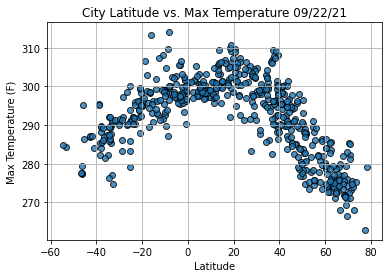

In [72]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

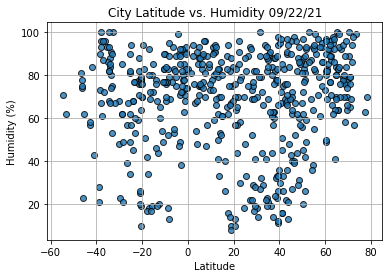

In [73]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

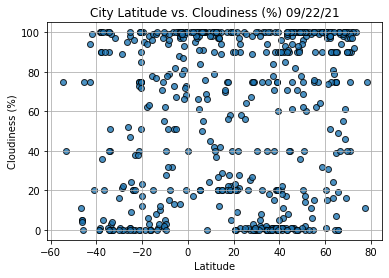

In [74]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

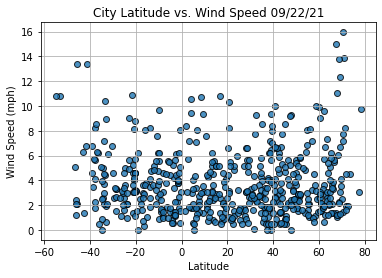

In [75]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()